In [0]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import math
from glob import glob
import os

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
INPUT = '/content/drive/My Drive/CSE140/' 

In [0]:
!unzip '/content/drive/My Drive/CSE140/rsnatrain224.zip' 
!unzip '/content/drive/My Drive/CSE140/rsnatest224.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: test224/ID_f01a148b8.png  
  inflating: test224/ID_f01b35bcb.png  
  inflating: test224/ID_f01ce0e40.png  
  inflating: test224/ID_f01cf73cf.png  
  inflating: test224/ID_f01d8e993.png  
  inflating: test224/ID_f0203c551.png  
  inflating: test224/ID_f02063d52.png  
  inflating: test224/ID_f0207a3c3.png  
  inflating: test224/ID_f020ddb58.png  
  inflating: test224/ID_f0212da0a.png  
  inflating: test224/ID_f021f2066.png  
  inflating: test224/ID_f022bd976.png  
  inflating: test224/ID_f0233aa3c.png  
  inflating: test224/ID_f0235d82e.png  
  inflating: test224/ID_f02544df1.png  
  inflating: test224/ID_f02678b14.png  
  inflating: test224/ID_f0274c5be.png  
  inflating: test224/ID_f02a2b81c.png  
  inflating: test224/ID_f02b4dda2.png  
  inflating: test224/ID_f02d155f7.png  
  inflating: test224/ID_f02f17721.png  
  inflating: test224/ID_f02f2e8ea.png  
  inflating: test224/ID_f031e8e5f.png  
  inflating: test224/ID_f0329

In [0]:
###Loading Train Stage one csv
trainData = pd.read_csv(INPUT + 'stage_1_train.csv')
#Load in test Data
testingData = pd.read_csv(INPUT + 'stage_1_sample_submission.csv')
trainData.head()
#testingData.head()

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0


In [0]:
label = trainData.Label.values

In [0]:
#making second column in csv
trainData = trainData.ID.str.rsplit("_", n = 1, expand = True)
trainData.loc[:, "label"] = label
trainData = trainData.rename({0: "id", 1: "subtype"}, axis=1)
trainData.head()

,id,subtype,label
0,ID_63eb1e259,epidural,0
1,ID_63eb1e259,intraparenchymal,0
2,ID_63eb1e259,intraventricular,0
3,ID_63eb1e259,subarachnoid,0
4,ID_63eb1e259,subdural,0


In [0]:
testData = testingData.ID.str.rsplit("_", n=1, expand=True)
testData = testData.rename({0: "id", 1: "subtype"}, axis=1)
testData.loc[:, "label"] = 0
testData.head()

,id,subtype,label
0,ID_28fbab7eb,epidural,0
1,ID_28fbab7eb,intraparenchymal,0
2,ID_28fbab7eb,intraventricular,0
3,ID_28fbab7eb,subarachnoid,0
4,ID_28fbab7eb,subdural,0


In [0]:
trainData = pd.pivot_table(trainData, index = "id", columns = "subtype", values = "label")
trainData.head()

subtype,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
id,,,,,,
ID_000039fa0,0,0,0,0,0,0
ID_00005679d,0,0,0,0,0,0
ID_00008ce3c,0,0,0,0,0,0
ID_0000950d7,0,0,0,0,0,0
ID_0000aee4b,0,0,0,0,0,0


In [0]:
testData = pd.pivot_table(testData, index = "id", columns = "subtype", values = "label")
testData.head()

subtype,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
id,,,,,,
ID_000012eaf,0,0,0,0,0,0
ID_0000ca2f6,0,0,0,0,0,0
ID_000259ccf,0,0,0,0,0,0
ID_0002d438a,0,0,0,0,0,0
ID_00032d440,0,0,0,0,0,0


# This is where things changed

In [0]:
trainData.index.names

FrozenList(['id'])

In [0]:
trainData.index[0]

'ID_000039fa0'

In [0]:
trainImages = '/content/train224/'
testImages  = '/content/test224/'

In [0]:
y = []
file_path = []
for i in range(round(len(trainData)/60)):
      file_path.append(trainImages + trainData.index[i] + '.png')
      y.append(trainData.values[i])
y = np.array(y)

print(round(len(trainData)/60))

11238


In [0]:
x = []
for i, myPath in enumerate(file_path):
    img = cv2.imread(myPath)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = img[16:240, 16:240]
    x.append(img)
x = np.array(x)

In [0]:
test_names = []
file_path2  = []
for i in range(round(len(testData)/10)):
      file_path2.append(testImages + testData.index[i] + '.png')
      test_names.append(testData.values[i])
test_names = np.array(test_names)
print(len(testData)/10)

7854.5


In [0]:
test_images = []
for path2 in (file_path2):
    img = cv2.imread(path2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[16:240, 16:240]
    test_images.append(img)
test_images = np.array(test_images)

In [0]:
valid_images = len(y)
random_num = np.random.permutation(valid_images)
x_ran = []
y_ran = []

for i in range(valid_images):
    x_ran.append(x[random_num[i]])
    y_ran.append(y[random_num[i]])
    
x = np.array(x_ran)
y = np.array(y_ran)
print(len(y))

11238


In [0]:

val_split_num = int(round(0.2*len(y)))
x_train = x[val_split_num:]
y_train = y[val_split_num:]
x_test = x[:val_split_num]
y_test = y[:val_split_num]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (8990, 224, 224, 3)
y_train (8990, 6)
x_test (2248, 224, 224, 3)
y_test (2248, 6)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 224, 224, 3

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

Using TensorFlow backend.






58892288/58889256 [==============================] - 5s 0us/step








In [0]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(6, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

batch_size = 30
epochs = 200

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)


history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)]
)

Epoch 1/200
299/299 [==============================] - 89s 296ms/step - loss: 0.1583 - acc: 0.9459 - val_loss: 0.1631 - val_acc: 0.9445
Epoch 2/200
299/299 [==============================] - 88s 294ms/step - loss: 0.1542 - acc: 0.9465 - val_loss: 0.1605 - val_acc: 0.9452
Epoch 3/200
299/299 [==============================] - 87s 292ms/step - loss: 0.1511 - acc: 0.9471 - val_loss: 0.1820 - val_acc: 0.9422
Epoch 4/200
299/299 [==============================] - 88s 294ms/step - loss: 0.1496 - acc: 0.9471 - val_loss: 0.1692 - val_acc: 0.9441
Epoch 5/200
299/299 [==============================] - 90s 301ms/step - loss: 0.1477 - acc: 0.9476 - val_loss: 0.1574 - val_acc: 0.9456
Epoch 6/200
299/299 [==============================] - 88s 294ms/step - loss: 0.1454 - acc: 0.9478 - val_loss: 0.1607 - val_acc: 0.9462
Epoch 7/200
299/299 [==============================] - 88s 295ms/step - loss: 0.1468 - acc: 0.9479 - val_loss: 0.1665 - val_acc: 0.9457
Epoch 8/200
299/299 [===========================

In [0]:
#test_images = test_images.astype('float32')
#test_images /= 255

In [0]:
#predictions = model.predict(test_images)

Text(0.5, 1.0, 'Training and validation loss')

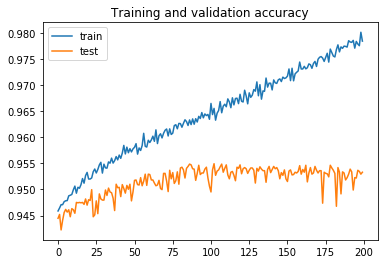

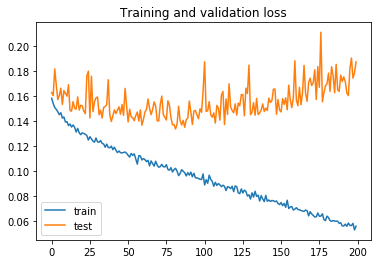

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train', 'test'], loc='lower left')
plt.title('Training and validation loss')

In [0]:
model_save_name = 'rsna_classifier.pt'
path = "/content/drive/My Drive/" + model_save_name 
torch.save(model.state_dict(), path)  

NameError: ignored